In [19]:
import random
import numpy as np
import pandas as pd
from tabulate import tabulate

from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

# 1) Experimentando Diferentes conjuntos de dados

## 1.1) Pré-processamento

### 1.1.1) Retornando array flatten

In [20]:
def config_ravel(y_train, y_test):
    y_train_ravel = y_train.values.ravel()
    y_test_ravel = y_test.values.ravel()  

    return y_train_ravel, y_test_ravel

### 1.1.2) Padronizar as características (normalização)

In [21]:
def config_standart_scaler(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

## 1.2) Carregar os dados de treinamento e teste

In [22]:
X_train_array = []
y_train_array = []
X_test_array = []
y_test_array = []  

def get_data_from_conjunto(conjunto: int):      

    X_train = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/X_train.csv')
    y_train = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/y_train.csv')
    X_test = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/X_test.csv')
    y_test = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/y_test.csv')

    num_classes = len(np.unique(y_train))
    input = X_train.shape[1]
    
    y_train, y_test = config_ravel(y_train, y_test)
    # y_train, y_test = config_standart_scaler(X_train, X_test)

    X_train_array.append(X_train)
    y_train_array.append(y_train)
    X_test_array.append(X_test)
    y_test_array.append(y_test)

    return num_classes, input, X_train_array, y_train_array, X_test_array, y_test_array

## 1.3) Montando rede

In [23]:
def train_knns(X_train, y_train):

    knn_model = KNeighborsClassifier(n_neighbors=3) 

    cv_scores = cross_val_predict(knn_model, X_train, y_train, cv=5)

    knn_model.fit(X_train, y_train)

    # Calculando métricas para cada fold
    accuracy = accuracy_score(y_train, cv_scores)
    f1 = f1_score(y_train, cv_scores, average='weighted')  # 'weighted' para lidar com classes desbalanceadas
    recall_per_class = recall_score(y_train, cv_scores, average=None)  # Revocação por classe
    recall_average = sum(recall_per_class) / len(recall_per_class)  # Média da revocação
    precision_per_class = precision_score(y_train, cv_scores, average=None)  # Precisão por classe
    precision_average = sum(precision_per_class) / len(precision_per_class)  # Média da precisão

    return accuracy, f1, recall_average, precision_average, knn_model

## 1.4) Carregando dados e treinando (Cross validation)

In [24]:
conjuntos = 10
resultados_acuracia = []
resultados_precisao = []
resultados_revocacao = []
resultados_f1 = []
best_models = []

for i in range(conjuntos):
    print(f'\nConjunto {i + 1}')
    num_classes, input, X_train_array, y_train_array, X_test_array, y_test_array = get_data_from_conjunto(i)

    media_accuracy, media_f1, media_recall, media_precision, model = train_knns(X_train_array[i], y_train_array[i])

    print(f'Acurácia: {media_accuracy}')
    print(f'F1: {media_f1}')
    print(f'Revocação: {media_recall}')
    print(f'Precisão: {media_precision}')

    resultados_acuracia.append(media_accuracy)
    resultados_precisao.append(media_precision)
    resultados_revocacao.append(media_recall)
    resultados_f1.append(media_f1)
    best_models.append(model)


Conjunto 1
Acurácia: 0.94
F1: 0.9395266768285031
Revocação: 0.935143497241811
Precisão: 0.937547872712314

Conjunto 2
Acurácia: 0.9457142857142857
F1: 0.94560138006185
Revocação: 0.9398308380991326
Precisão: 0.9449221276807483

Conjunto 3
Acurácia: 0.96
F1: 0.95982215007215
Revocação: 0.9560079024161863
Precisão: 0.9572350357657494

Conjunto 4


Acurácia: 0.9442857142857143
F1: 0.9439965039274789
Revocação: 0.9398018166804295
Precisão: 0.9425407881891171

Conjunto 5
Acurácia: 0.9642857142857143
F1: 0.9641224416846
Revocação: 0.9625557858608996
Precisão: 0.9617335325081804

Conjunto 6
Acurácia: 0.9628571428571429
F1: 0.9626465133531785
Revocação: 0.9597740011843937
Precisão: 0.9618187883686536

Conjunto 7
Acurácia: 0.9528571428571428
F1: 0.9525654179521134
Revocação: 0.9498037511195405
Precisão: 0.9514301676348107

Conjunto 8
Acurácia: 0.9528571428571428
F1: 0.952613398700513
Revocação: 0.9486786506929551
Precisão: 0.9513533895840615

Conjunto 9
Acurácia: 0.9457142857142857
F1: 0.945438613956494
Revocação: 0.9414006322497933
Precisão: 0.9422820444811818

Conjunto 10
Acurácia: 0.9657142857142857
F1: 0.9655535416336771
Revocação: 0.9652103096407197
Precisão: 0.9638982751198347


## 1.5) Analisando resultados gerais

In [25]:
# Calculate the overall mean
overall_mean_acuracia = sum(resultados_acuracia) / len(resultados_acuracia)
overall_mean_precisao = sum(resultados_precisao) / len(resultados_precisao)
overall_mean_revocacao = sum(resultados_revocacao) / len(resultados_revocacao)
overall_mean_f1 = sum(resultados_f1) / len(resultados_f1)

# Create a DataFrame
data = {
    'Acurácia': [overall_mean_acuracia],
    'Precisão': [overall_mean_precisao],
    'Revocação': [overall_mean_revocacao],
    'F1-Score': [overall_mean_f1]
}

df = pd.DataFrame(data)

# Display the table
print(df)

   Acurácia  Precisão  Revocação  F1-Score
0  0.953429  0.951476   0.949821  0.953189


## 1.6) Matriz de confusao e resultados da predição

----------------------------------------------------------------
Eficácia do conjunto 1


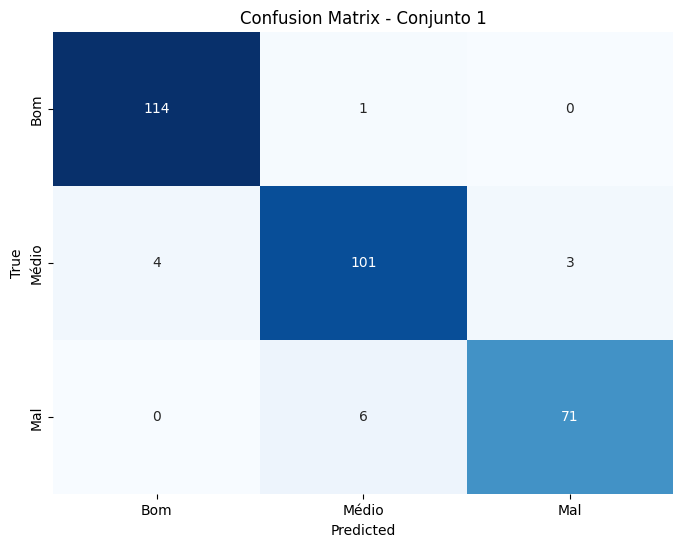

Acurácia no conjunto de teste: 95.33%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.97      0.99      0.98       115
       Medio       0.94      0.94      0.94       108
        Ruim       0.96      0.92      0.94        77

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300


----------------------------------------------------------------

Eficácia do conjunto 2


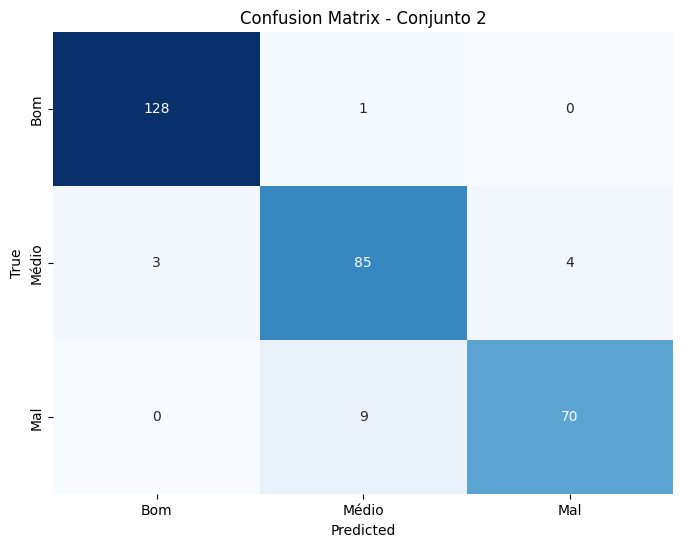

Acurácia no conjunto de teste: 94.33%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.98      0.99      0.98       129
       Medio       0.89      0.92      0.91        92
        Ruim       0.95      0.89      0.92        79

    accuracy                           0.94       300
   macro avg       0.94      0.93      0.94       300
weighted avg       0.94      0.94      0.94       300


----------------------------------------------------------------

Eficácia do conjunto 3


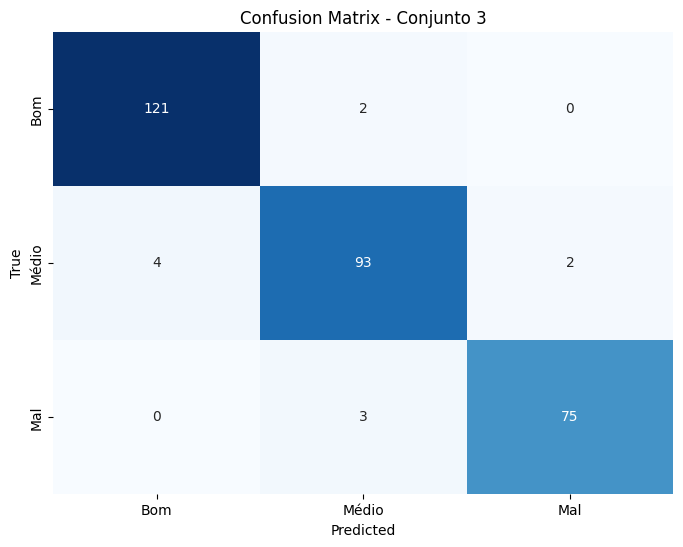

Acurácia no conjunto de teste: 96.33%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.97      0.98      0.98       123
       Medio       0.95      0.94      0.94        99
        Ruim       0.97      0.96      0.97        78

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300


----------------------------------------------------------------

Eficácia do conjunto 4


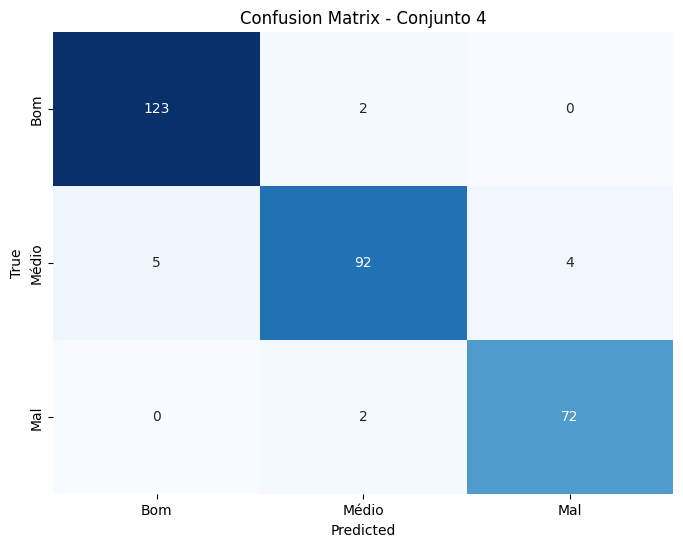

Acurácia no conjunto de teste: 95.67%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.96      0.98      0.97       125
       Medio       0.96      0.91      0.93       101
        Ruim       0.95      0.97      0.96        74

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300


----------------------------------------------------------------

Eficácia do conjunto 5


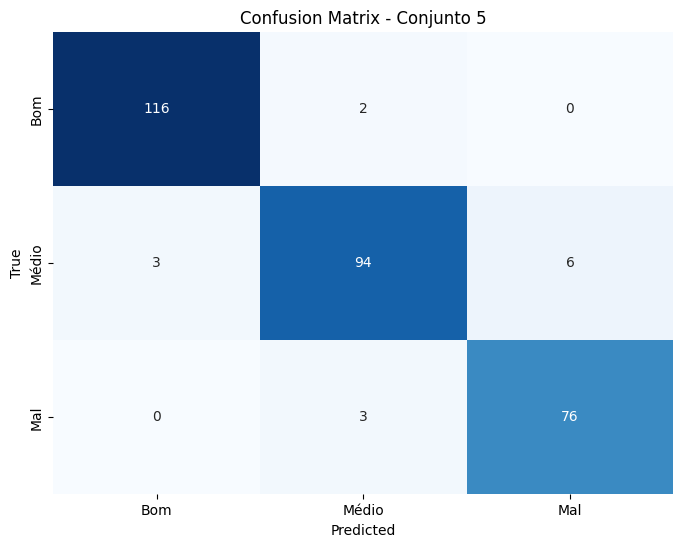

Acurácia no conjunto de teste: 95.33%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.97      0.98      0.98       118
       Medio       0.95      0.91      0.93       103
        Ruim       0.93      0.96      0.94        79

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300


----------------------------------------------------------------

Eficácia do conjunto 6


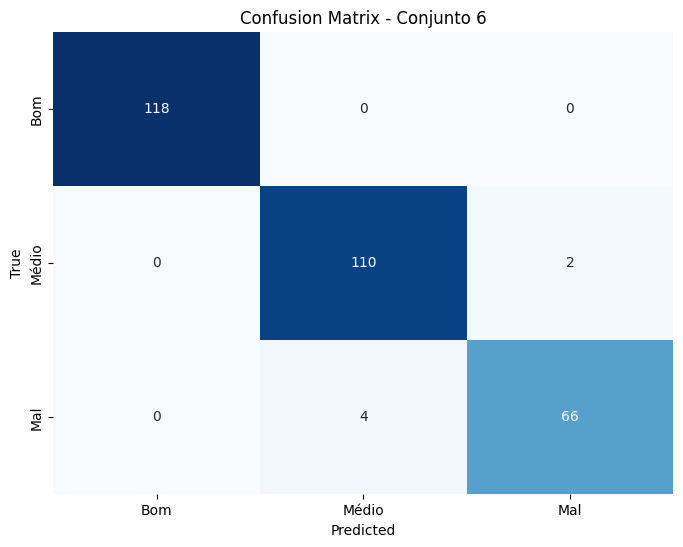

Acurácia no conjunto de teste: 98.00%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       1.00      1.00      1.00       118
       Medio       0.96      0.98      0.97       112
        Ruim       0.97      0.94      0.96        70

    accuracy                           0.98       300
   macro avg       0.98      0.97      0.98       300
weighted avg       0.98      0.98      0.98       300


----------------------------------------------------------------

Eficácia do conjunto 7


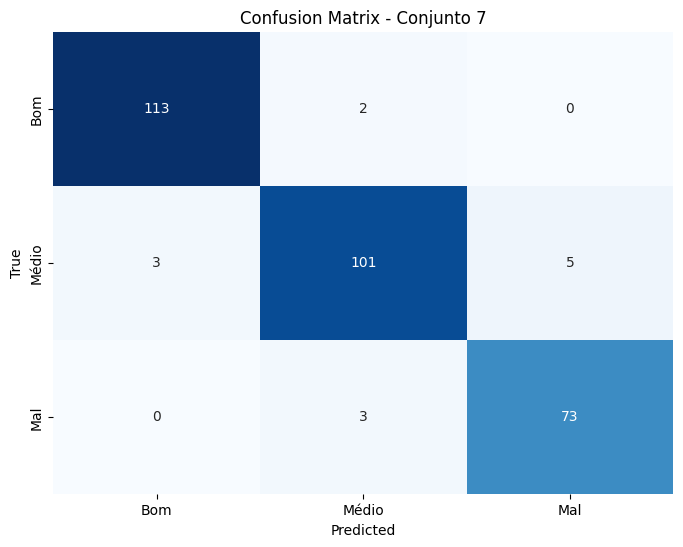

Acurácia no conjunto de teste: 95.67%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.97      0.98      0.98       115
       Medio       0.95      0.93      0.94       109
        Ruim       0.94      0.96      0.95        76

    accuracy                           0.96       300
   macro avg       0.95      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300


----------------------------------------------------------------

Eficácia do conjunto 8


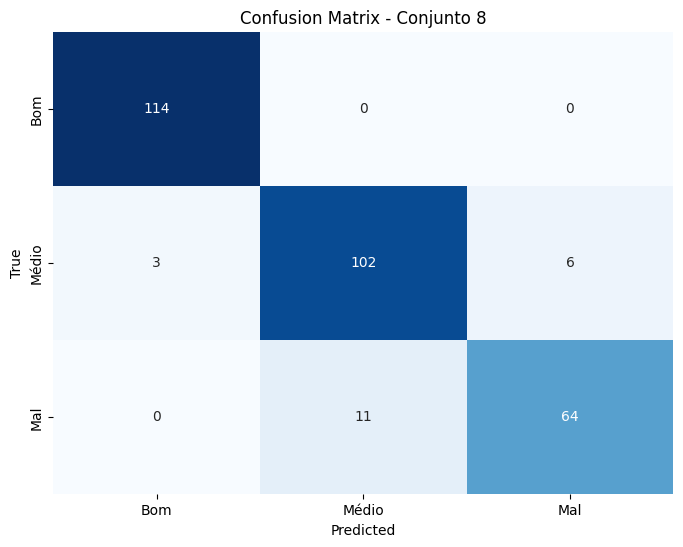

Acurácia no conjunto de teste: 93.33%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.97      1.00      0.99       114
       Medio       0.90      0.92      0.91       111
        Ruim       0.91      0.85      0.88        75

    accuracy                           0.93       300
   macro avg       0.93      0.92      0.93       300
weighted avg       0.93      0.93      0.93       300


----------------------------------------------------------------

Eficácia do conjunto 9


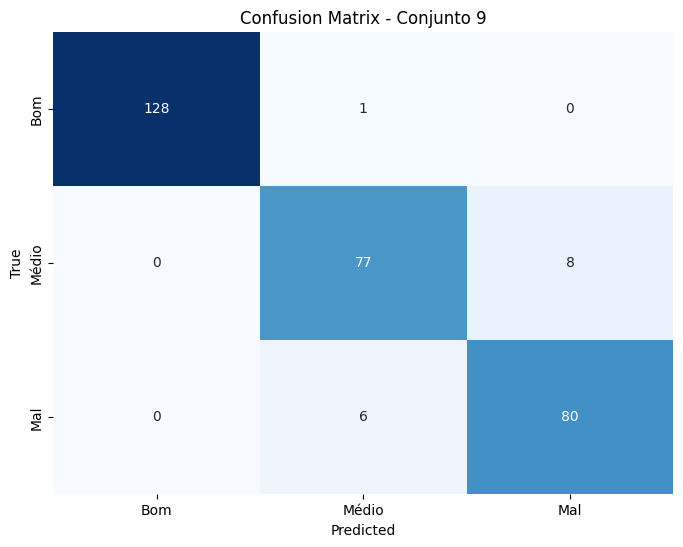

Acurácia no conjunto de teste: 95.00%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       1.00      0.99      1.00       129
       Medio       0.92      0.91      0.91        85
        Ruim       0.91      0.93      0.92        86

    accuracy                           0.95       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.95      0.95      0.95       300


----------------------------------------------------------------

Eficácia do conjunto 10


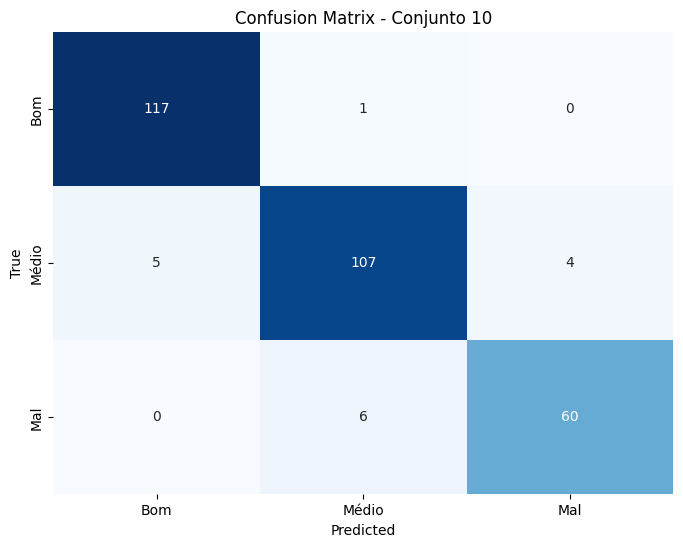

Acurácia no conjunto de teste: 94.67%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.96      0.99      0.97       118
       Medio       0.94      0.92      0.93       116
        Ruim       0.94      0.91      0.92        66

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.95      0.95       300


----------------------------------------------------------------



In [26]:
print("----------------------------------------------------------------")
# List to store average accuracies for each conjunto
average_accuracies = []
for i in range(conjuntos):
    print(f'Eficácia do conjunto {i + 1}')
    X_test = X_test_array[i]
    y_test = y_test_array[i]

    # Load the trained model for the current dataset
    naiveBayes = best_models[i]

    # Make predictions on the test set
    y_pred = naiveBayes.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Bom', 'Médio', 'Mal'], yticklabels=['Bom', 'Médio', 'Mal'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Conjunto {i + 1}')
    plt.show()

      # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append accuracy to the list
    average_accuracies.append(accuracy)
    
    print(f'Acurácia no conjunto de teste: {accuracy * 100:.2f}%\n')


    # Print classification report
    classification_rep = classification_report(y_test, y_pred)
    print(f'Relatório de Classificação:\n{classification_rep}')
    

    print('\n----------------------------------------------------------------\n')

In [27]:
# Find the index of the conjunto with the highest average accuracy
best_conjunto_index = np.argmax(average_accuracies)

# Print the conjunto with the highest average accuracy
print(f"\nO conjunto {best_conjunto_index + 1} obteve os melhores resultados.")


O conjunto 6 obteve os melhores resultados.


# 2) Experimentando as melhores configurações de parametros

## OBS: Pegando um conjunto aleatorio entre os 10 


In [28]:
conjunto_aleatorio = random.randint(0, 9)

# Print the conjunto with the highest average accuracy
print(f"\nO conjunto {conjunto_aleatorio + 1} será utilizado para o teste de parâmetros")


O conjunto 4 será utilizado para o teste de parâmetros


## 2.1) Carregar os dados de treinamento e teste

In [29]:
# MUDAR ISSO -> ESCOLHER UM NUMERO ENTRE 1 A 10 E PEGAR AQUELE CONJUNTO

X_train = X_train_array[conjunto_aleatorio]
y_train = y_train_array[conjunto_aleatorio]
X_test = X_test_array[conjunto_aleatorio]
y_test = y_test_array[conjunto_aleatorio]


## 2.2) Treinando modelo 

In [30]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Teste diferentes valores para o número de vizinhos
    'weights': ['uniform', 'distance'],  # Teste pesos uniformes e ponderados pela distância
    'p': [1, 2],  # Teste distância de Manhattan (p=1) e distância Euclidiana (p=2)
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

## 2.3) Analisando todas combinações

In [31]:
# Seus dados do GridSearchCV
results = grid_search.cv_results_
param_combinations = [f'{params}' for params in grid_search.cv_results_['params']]
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']

table_data = []

for i in range(len(param_combinations)):
    row = [i+1, param_combinations[i], train_scores[i], test_scores[i]]  # Adicione o índice de linha (i+1)
    table_data.append(row)

# Crie a tabela usando a função tabulate
table = tabulate(table_data, headers=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'], tablefmt='fancy_grid', numalign='left')

print(table)

╒══════════════╤════════════════════════════════════════════════════╤═══════════════╤════════════════════╕
│ Combinação   │ Hiperparâmetros                                    │ Train Score   │ Validation Score   │
╞══════════════╪════════════════════════════════════════════════════╪═══════════════╪════════════════════╡
│ 1            │ {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}   │ 0.983929      │ 0.952857           │
├──────────────┼────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 2            │ {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}  │ 1             │ 0.952857           │
├──────────────┼────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 3            │ {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}   │ 0.978214      │ 0.944286           │
├──────────────┼────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 4            │ {'n_neighbors': 3, '

## 2.4) Analisando Cada combinação para var_smoothing

In [32]:

# # Extrair os resultados do GridSearchCV
# results = grid_search.cv_results_

# # Valores únicos de var_smoothing
# var_smoothing_values = param_grid['var_smoothing']

# # Precisões obtidas no treinamento (média de validação cruzada)
# train_scores = results['mean_train_score']

# # Precisões obtidas no teste (média de validação cruzada)
# test_scores = results['mean_test_score']

# # Número de combinações de hiperparâmetros
# n_combinations = len(param_grid['priors']) * len(var_smoothing_values)

# # Largura das barras
# bar_width = 0.35

# # Loop para criar gráficos separados para cada var_smoothing
# for i, var_smoothing in enumerate(var_smoothing_values):
#     plt.figure(figsize=(12, 6))
    
#     # Índices para o eixo x
#     x_indices = np.arange(len(param_grid['priors']))
    
#     # Precisões correspondentes de treinamento e teste para este var_smoothing
#     train_scores_var_smoothing = train_scores[i::n_combinations]
#     test_scores_var_smoothing = test_scores[i::n_combinations]
    
#     # Rótulos para as combinações de hiperparâmetros
#     labels = [f'priors={priors}' for priors in param_grid['priors']]
    
#     plt.bar(x_indices, train_scores_var_smoothing, width=bar_width, label='Treinamento', color='b', align='center')
#     plt.bar(x_indices + bar_width, test_scores_var_smoothing, width=bar_width, label='Teste', color='g', align='center')
    
#     plt.xlabel('Combinação de Hiperparâmetros')
#     plt.ylabel('Precisão')
#     plt.title(f'Precisão de Treinamento e Teste para var_smoothing={var_smoothing}')
#     plt.xticks(x_indices + bar_width / 2, labels, rotation=45)
#     plt.legend()
#     plt.tight_layout()

#     plt.show()

## 2.5) Tabela comparativa para todas combinações

In [33]:
results = grid_search.cv_results_
param_combinations = [f'{params}' for params in grid_search.cv_results_['params']]
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']

table_data = []

for i in range(len(param_combinations)):
    row = [i+1, param_combinations[i], train_scores[i], test_scores[i]]
    table_data.append(row)

table = tabulate(table_data, headers=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'], tablefmt='fancy_grid', numalign='left')

print(table)

# # Crie um DataFrame a partir dos dados da tabela
# df = pd.DataFrame(table_data, columns=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'])

# # Salve o DataFrame em um arquivo CSV
# df.to_csv('resultados.csv', index=False)  # Isso salvará os dados em um arquivo CSV chamado 'resultados.csv'

╒══════════════╤════════════════════════════════════════════════════╤═══════════════╤════════════════════╕
│ Combinação   │ Hiperparâmetros                                    │ Train Score   │ Validation Score   │
╞══════════════╪════════════════════════════════════════════════════╪═══════════════╪════════════════════╡
│ 1            │ {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}   │ 0.983929      │ 0.952857           │
├──────────────┼────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 2            │ {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}  │ 1             │ 0.952857           │
├──────────────┼────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 3            │ {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}   │ 0.978214      │ 0.944286           │
├──────────────┼────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 4            │ {'n_neighbors': 3, '

## 2.6) Predição para o melhor modelo

In [34]:
best_naive_bayes = grid_search.best_estimator_

y_pred = best_naive_bayes.predict(X_test)

## 2.7) Matriz Confusão

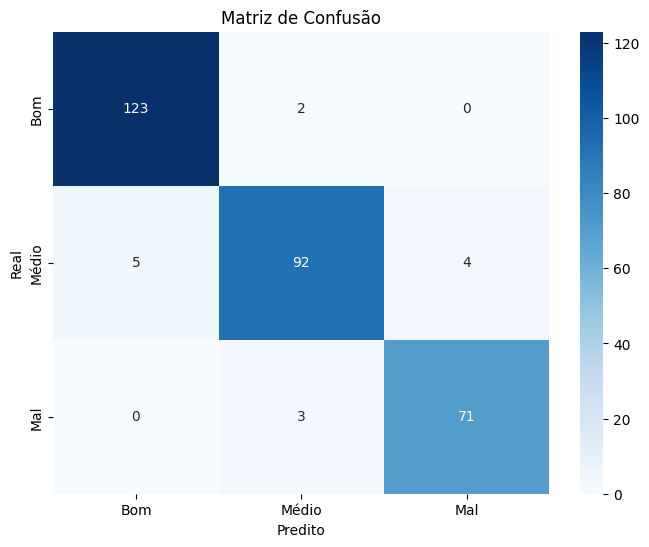

In [35]:
cm = confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bom', 'Médio', 'Mal'], yticklabels=['Bom', 'Médio', 'Mal'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

## 2.8) Métricas de eficácia

In [36]:
print(f'Melhores Hiperparâmetros Encontrados: {grid_search.best_params_}')

print("----------------------------------------------------------------\n")
classification_rep = classification_report(y_test, y_pred)
print(f'Relatório de Classificação:\n{classification_rep}')

print("----------------------------------------------------------------\n")
accuracy = accuracy_score(y_test, y_pred)  
print(f'Acurácia: {accuracy}')

precision = precision_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Precisão: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Medida F: {f1}')

Melhores Hiperparâmetros Encontrados: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
----------------------------------------------------------------

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.96      0.98      0.97       125
       Medio       0.95      0.91      0.93       101
        Ruim       0.95      0.96      0.95        74

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

----------------------------------------------------------------

Acurácia: 0.9533333333333334
Precisão: 0.9532144508877434
Recall: 0.9533333333333334
Medida F: 0.9530785925591878
